In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

Computer = "SciClone"   # "SciClone"    "WinLap"  "LinLap"   "Desktop"  "PortLap"

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.40', '0.00', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')
PlotWidthIn = 11
PlotHeightIn = 3.75
PlotDPI = 120

In [2]:
Saving = True
import CoreFunctions as cf
import platform
import multiprocessing
from joblib import Parallel, delayed
import os

In [3]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\Laser Data\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'
    

if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/scr10/dchendrickson01/Laser Data/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder #+ "SmallCopy\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'SmallCopy/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'SmallCopy\\'


In [4]:
def getDataFromfiles(file):
    try:
        DS = np.genfromtxt(open(file,'r'), delimiter=',',skip_header=0)
        if np.shape(DS)[1]==4:
            DS = DS[:,2:4]
    except:
        print('Fail on file',file)
        DS = file
    return DS

In [5]:
files = os.listdir(folder)
AllData = Parallel(n_jobs=13)(delayed(getDataFromfiles)(folder + file) for file in files)


In [6]:
for i in range(len(files)):
    print(i, files[i],np.shape(AllData[i]))

0 Test Stand 500hz at 50khz sampling.csv (599994, 2)
1 Satck 25 starting to hoist.csv (600000, 2)
2 stack 27 entering tz 2.csv (600000, 2)
3 Stack 25 accelerating away end of transfer zone.csv (600000, 2)
4 stack 27 crane moving away third down track.csv (600000, 2)
5 Stack 25 both cranes moving away, half speed by center anchor.csv (600000, 2)
6 Test Stand 60Hz at 200khz sampling.csv (600000, 2)
7 stack 25 coming into zone.csv (600000, 2)
8 stack 25 coming towards.csv (600000, 2)
9 stack 27 runnding down track away.csv (600000, 2)
10 stack 25 crane leaving transfer zone.csv (600000, 2)
11 stack 27 moving away rom close.csv (600000, 2)
12 Stack 25 empty bar hoist down in transfer zone.csv (600000, 2)
13 stack 27 cranes moving towards eachother half way down track.csv (600000, 2)
14 Stack 25 full speed towards me, 200 foot away, noise in track.csv (600000, 2)
15 stack 27 lowering bar maybe getting impact wiht box.csv (600000, 2)
16 stack 25 haflway down track coming towards.csv (600000,

In [7]:
Good = range(0,60)
print(Good)

range(0, 60)


In [8]:
def PrintPictures(g):
    try:
        DataSet = AllData[g]
        DifferenceSet = np.matrix(np.subtract(DataSet[:,0],DataSet[:,1])).T
        DataSet = np.concatenate((DataSet, DifferenceSet), axis = 1)
        Head1 = cf.Smoothing(np.array(DataSet[:,0]).flatten(),2)
        Head2 = cf.Smoothing(np.array(DataSet[:,1]).flatten(),2)
        Diff = cf.Smoothing(np.array(DataSet[:,2]).flatten(),2)
        Head1 -= np.average(Head1)
        Head2 -= np.average(Head2)
        Diff -= np.average(Diff)
        DifferenceSet -= np.average(DifferenceSet)
        fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=600)
        #plt.plot(Head1)
        #plt.plot(Head2)
        plt.plot(DifferenceSet)
        plt.plot(Diff)
        plt.title(files[g] + ' Differences Only')
        #plt.plot(DataSet[3,:])
        plt.savefig(rootfolder+'image/TrackLasers/'+'DifferencesOnly' +files[g][:-4]+'.png')
        #plt.show()
        #FullFP2 = cf.getThumbprint2(Diff, 'sym6',250,1,8)
        #hh = cf.PlotFingerPrint(FullFP2[320000:340000].T,'250 Scales Difference - ' +files[g][:-4], rootfolder+'image/TrackLasers/', True)
    except:
        print(g)

In [9]:
Things = Parallel(n_jobs=30)(delayed(PrintPictures)(g) for g in Good)


In [10]:
check = [0,17,20,35,58]
for c in check:
    print(c,files[c], np.shape(AllData[c]))

0 Test Stand 500hz at 50khz sampling.csv (599994, 2)
17 stack 54 - 2nd crane moving slow speed.csv (240004, 2)
20 Test Stand 500Hz at 200khz sampling.csv (599997, 2)
35 Stack 54 not moving.csv (240000, 2)
58 Stack 52 - picking up box and leaving transfer zone.csv (239997, 2)


In [11]:
np.shape(AllData[2])
DataSet = AllData[11]

In [12]:
DifferenceSet = np.matrix(np.subtract(DataSet[:,0],DataSet[:,1])).T
DataSet = np.concatenate((DataSet, DifferenceSet), axis = 1)

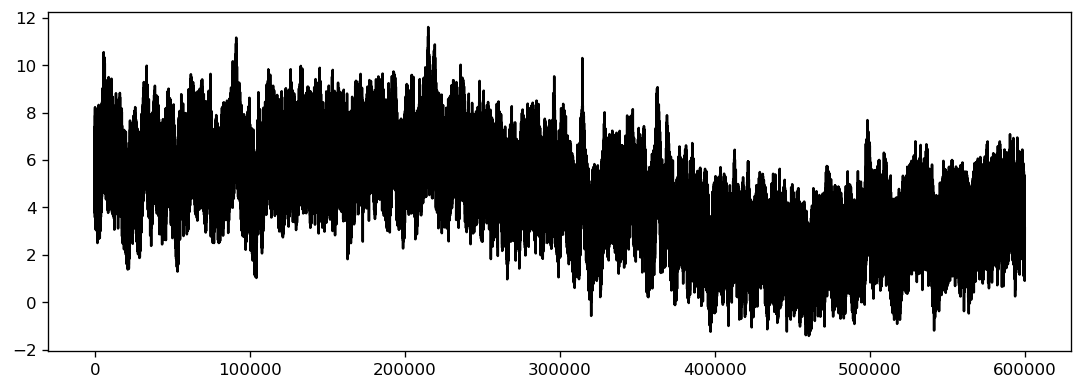

In [13]:
fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
#plt.plot(DataSet[:,0])
plt.plot(DataSet[:,1])
#plt.plot(DataSet[:,2])
#plt.plot(DataSet[3,:])
plt.show()

In [14]:
Head1 = cf.Smoothing(np.array(DataSet[:,0]).flatten(),2)
Head2 = cf.Smoothing(np.array(DataSet[:,1]).flatten(),2)
Diff = cf.Smoothing(np.array(DataSet[:,2]).flatten(),2)

In [19]:
Normed1 = DataSet[:,0] - np.average(DataSet[:,0])
Normed2 = DataSet[:,1] - np.average(DataSet[:,1])
NormedDiff = DataSet[:,2] - np.average(DataSet[:,2])

0
58


In [15]:
Head1 -= np.average(Head1)
Head2 -= np.average(Head2)
Diff -= np.average(Diff)

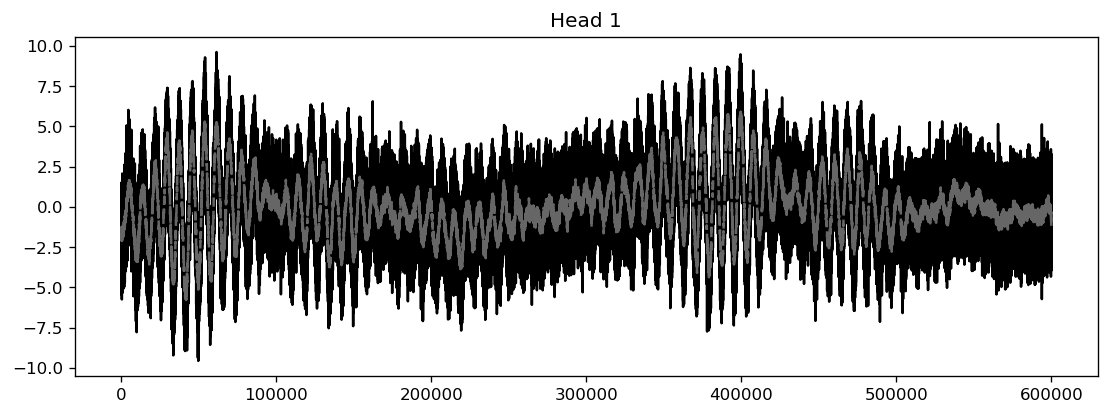

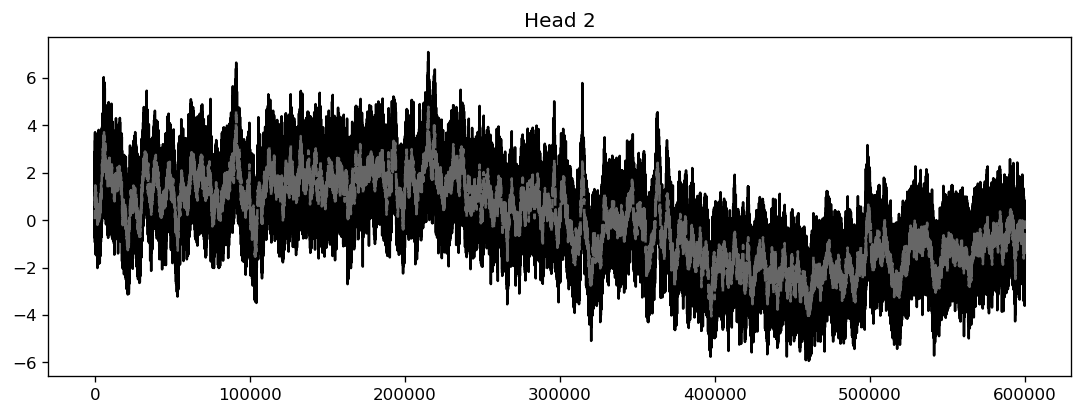

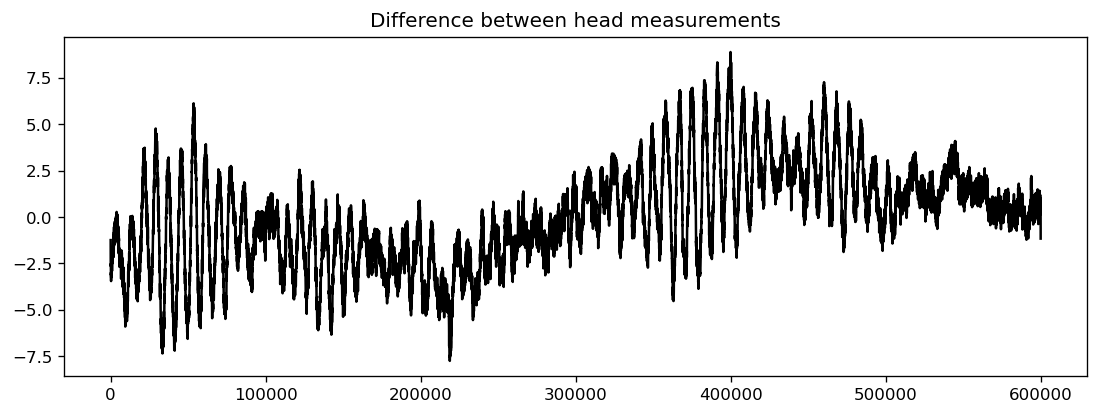

20


In [20]:
fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
plt.plot(Normed1)
plt.plot(Head1)
plt.title('Head 1')
plt.show()

fig = plt.figure(figsize=(PlotWidthIn, PlotHeightIn),dpi=PlotDPI)
plt.plot(Normed2)
plt.plot(Head2)
plt.title('Head 2')
plt.show()

fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
plt.plot(Diff)
plt.title('Difference between head measurements')
#plt.plot(DataSet[3,:])
plt.show()

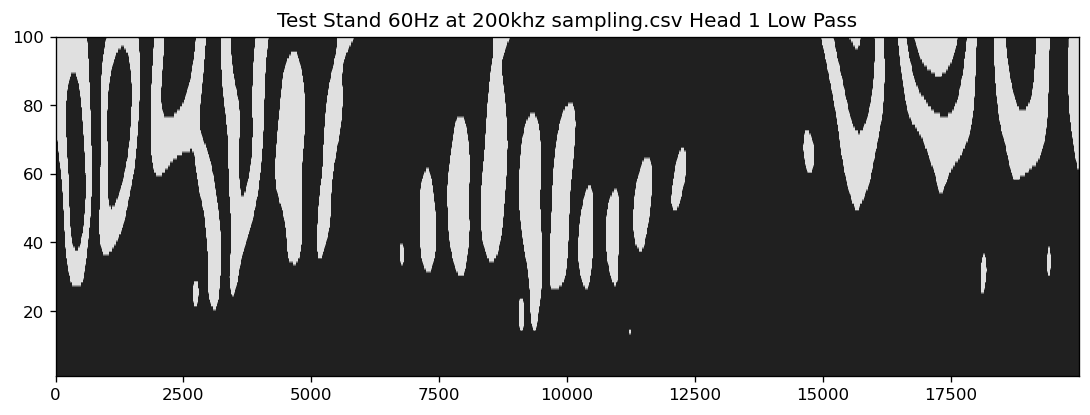

In [24]:
FullFP1 = cf.getThumbprint2(Head1, 'sym5',100,20)
h = cf.PlotFingerPrint(FullFP1[300000:320000].T,files[11]+' Head 1 Low Pass')

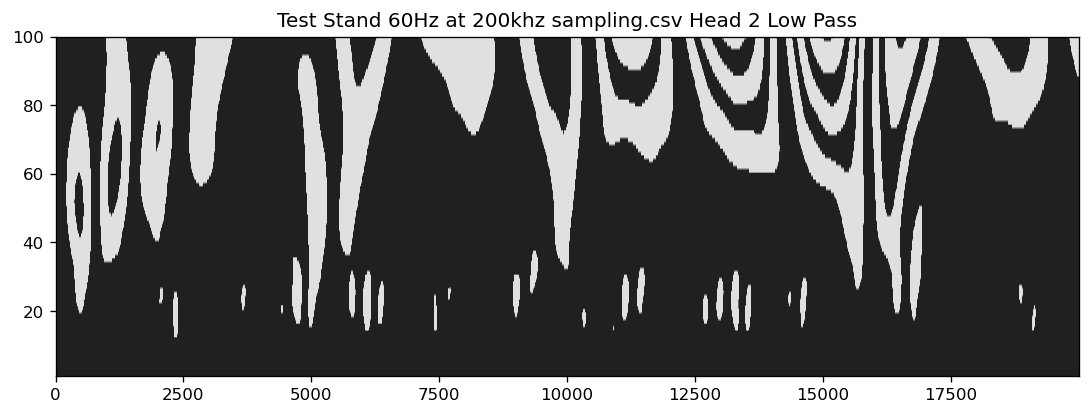

In [25]:
FullFP2 = cf.getThumbprint2(Head2, 'sym5',100,20)
hh = cf.PlotFingerPrint(FullFP2[300000:320000].T,files[11]+' Head 2 Low Pass')

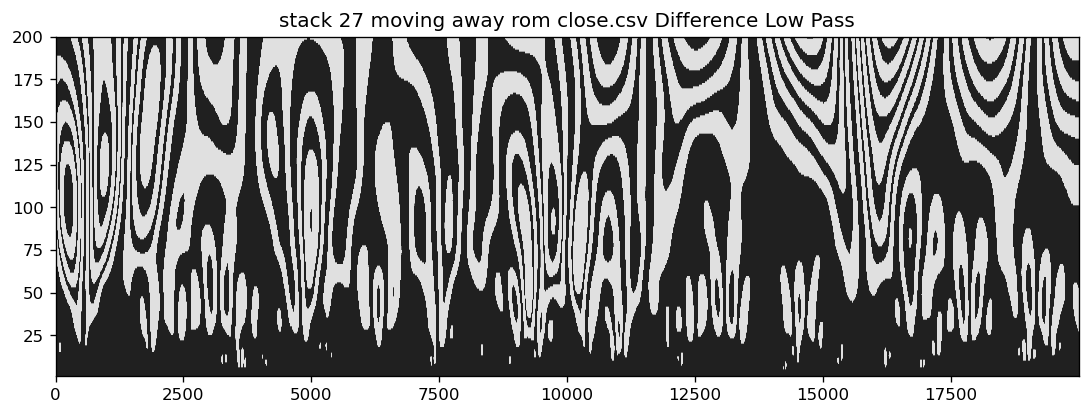

In [30]:
FullFP2 = cf.getThumbprint2(Diff, 'sym6',200,10,10)
hh = cf.PlotFingerPrint(FullFP2[300000:320000].T,files[11]+' Difference Low Pass')

In [27]:
FullFP1 = cf.getThumbprint2(np.array(filteredDataSet[:,0].T).flatten(), 'sym6',1000,20)
FullFP2 = cf.getThumbprint2(np.array(filteredDataSet[:,1].T).flatten(), 'sym6',1000,20)
FullFP3 = cf.getThumbprint2(np.array(filteredDataSet[:,2].T).flatten(), 'sym6',1000,20)

NameError: name 'filteredDataSet' is not defined

In [ ]:
h1 = cf.PlotFingerPrint([FullFP1.T,files[6]+' Head 1'])
h2 = cf.PlotFingerPrint([FullFP2.T,files[6]+' Head 2'])
hd = cf.PlotFingerPrint([FullFP3.T,files[6]+' Head Diff'])